# Stock Analysis - Position Management

In [68]:
import talib as ta
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

import plotly.graph_objects as go

## 1.Parameter Assumption

In [69]:
benchmark = 'SPY'
start_time = datetime.now() - timedelta(days = 600)
end_time = datetime.now()

## 2. Data Preparation (yahoo finance)

In [70]:
mkt=web.get_data_yahoo(benchmark,start=start_time-timedelta(days = 100),end=end_time)
mkt.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-29,373.809998,374.000000,370.829987,371.459991,371.459991,53680500
2020-12-30,372.339996,373.100006,371.570007,371.989990,371.989990,49455300
2020-12-31,371.779999,374.660004,371.230011,373.880005,373.880005,78469000
2021-01-04,375.309998,375.450012,364.820007,368.790009,368.790009,110011700
2021-01-05,368.100006,372.489990,368.049988,371.489990,371.489990,47876446


## 3.Model Development

In [71]:
# Build Guppy Multiple Moving Average( - )GMMA

mkt['GMMA_s1'] = ta.EMA(mkt['Close'],3)
mkt['GMMA_s2'] = ta.EMA(mkt['Close'],5)
mkt['GMMA_s3'] = ta.EMA(mkt['Close'],8)
mkt['GMMA_s4'] = ta.EMA(mkt['Close'],10)
mkt['GMMA_s5'] = ta.EMA(mkt['Close'],12)
mkt['GMMA_s6'] = ta.EMA(mkt['Close'],15)
mkt['GMMA_l1'] = ta.EMA(mkt['Close'],30)
mkt['GMMA_l2'] = ta.EMA(mkt['Close'],35)
mkt['GMMA_l3'] = ta.EMA(mkt['Close'],40)
mkt['GMMA_l4'] = ta.EMA(mkt['Close'],45)
mkt['GMMA_l5'] = ta.EMA(mkt['Close'],50)
mkt['GMMA_l6'] = ta.EMA(mkt['Close'],60)

mkt['GMMA_s_high'] = mkt[['GMMA_s1','GMMA_s2','GMMA_s3','GMMA_s4','GMMA_s5','GMMA_s6']].max(axis=1)
mkt['GMMA_s_low'] = mkt[['GMMA_s1','GMMA_s2','GMMA_s3','GMMA_s4','GMMA_s5','GMMA_s6']].min(axis=1)
mkt['GMMA_l_high'] = mkt[['GMMA_l1','GMMA_l2','GMMA_l3','GMMA_l4','GMMA_l5','GMMA_l6']].max(axis=1)
mkt['GMMA_l_low'] = mkt[['GMMA_l1','GMMA_l2','GMMA_l3','GMMA_l4','GMMA_l5','GMMA_l6']].min(axis=1)

mkt_df = mkt.loc[start_time:]
mkt_df.head()

,Open,High,Low,Close,Adj Close,Volume,GMMA_s1,GMMA_s2,GMMA_s3,GMMA_s4,...,GMMA_l1,GMMA_l2,GMMA_l3,GMMA_l4,GMMA_l5,GMMA_l6,GMMA_s_high,GMMA_s_low,GMMA_l_high,GMMA_l_low
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-17,285.140015,288.600006,285.119995,285.839996,276.598175,100353000,285.965578,285.933672,286.407842,286.786866,...,287.497763,287.147562,286.695065,286.100283,285.448059,284.029050,287.485059,285.933672,287.497763,284.029050
2019-05-20,284.059998,285.959991,283.119995,283.950012,274.769318,62877600,284.957795,285.272452,285.861657,286.271074,...,287.268876,286.969921,286.561160,286.006793,285.389312,284.026458,287.043178,284.957795,287.268876,284.026458
2019-05-21,285.829987,286.929993,285.549988,286.510010,277.246521,46847100,285.733903,285.684971,286.005736,286.314517,...,287.219917,286.944370,286.558665,286.028672,285.433261,284.107886,286.976532,285.684971,287.219917,284.107886
2019-05-22,285.450012,286.690002,285.100006,285.630005,276.394958,49482500,285.681954,285.666649,285.922240,286.190060,...,287.117342,286.871350,286.513365,286.011338,285.440977,284.157792,286.808216,285.666649,287.117342,284.157792
2019-05-23,283.160004,283.209991,280.570007,282.140015,273.017822,98733800,283.910984,284.491104,285.081745,285.453688,...,286.796224,286.608498,286.300031,285.843020,285.311527,284.091635,286.224691,283.910984,286.796224,284.091635


In [72]:
fig = go.Figure(data=[go.Candlestick(x=mkt_df.index,open=mkt_df['Open'],high=mkt_df['High'],low=mkt_df['Low'],close=mkt_df['Close'], showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_s1'], line=dict(color='orchid', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_s2'], line=dict(color='orchid', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_s3'], line=dict(color='orchid', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_s4'], line=dict(color='orchid', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_s5'], line=dict(color='orchid', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_s6'], line=dict(color='orchid', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_l1'], line=dict(color='blue', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_l2'], line=dict(color='blue', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_l3'], line=dict(color='blue', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_l4'], line=dict(color='blue', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_l5'], line=dict(color='blue', width=1), showlegend=False),
                      go.Scatter(x=mkt_df.index, y=mkt_df['GMMA_l6'], line=dict(color='blue', width=1), showlegend=False)
                     ])
fig.update_layout(xaxis_rangeslider_visible=True,
                  title=benchmark,
                  yaxis_title='Stock Price')
fig.show()

In [73]:
# Filter rows by dates
list_of_dates = ['2020-08-20','2020-08-21']   # must be a trading dates 
mkt_df.loc[mkt_df.index.isin(list_of_dates)]

,Open,High,Low,Close,Adj Close,Volume,GMMA_s1,GMMA_s2,GMMA_s3,GMMA_s4,...,GMMA_l1,GMMA_l2,GMMA_l3,GMMA_l4,GMMA_l5,GMMA_l6,GMMA_s_high,GMMA_s_low,GMMA_l_high,GMMA_l_low
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-20,335.359985,338.799988,335.220001,338.279999,335.501160,42207800,337.929018,337.574904,336.725073,336.032581,...,328.667143,326.970418,325.349918,323.817012,322.381242,319.81847,337.929018,334.153410,328.667143,319.81847
2020-08-21,337.920013,339.720001,337.549988,339.480011,336.691284,55106600,338.704515,338.209940,337.337281,336.659387,...,329.364747,327.665395,326.039191,324.498012,323.051782,320.46311,338.704515,334.819236,329.364747,320.46311


In [86]:
mkt_df['Position'] = np.nan
mkt_df.loc[(mkt_df['Close']>=mkt_df['GMMA_l_high']) & (mkt_df['Close']>=mkt_df['GMMA_s_high']),'Position'] = 1
mkt_df.loc[(mkt_df['Close']>=mkt_df['GMMA_l_high']) & (mkt_df['Close']<=mkt_df['GMMA_s_high']),'Position'] = 0.6
mkt_df.loc[(mkt_df['Close']<=mkt_df['GMMA_l_high']) & (mkt_df['Close']>=mkt_df['GMMA_s_high']),'Position'] = 0.4
mkt_df.loc[(mkt_df['Close']<=mkt_df['GMMA_l_high']) & (mkt_df['Close']<=mkt_df['GMMA_s_high']),'Position'] = 0
mkt_df.tail()

,Open,High,Low,Close,Adj Close,Volume,GMMA_s1,GMMA_s2,GMMA_s3,GMMA_s4,...,GMMA_l2,GMMA_l3,GMMA_l4,GMMA_l5,GMMA_l6,GMMA_s_high,GMMA_s_low,GMMA_l_high,GMMA_l_low,Position
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-29,373.809998,374.000000,370.829987,371.459991,371.459991,53680500,370.874070,370.258980,369.689534,369.358204,...,363.039777,361.690943,360.383917,359.117088,356.689321,370.874070,368.391159,364.424667,356.689321,1.0
2020-12-30,372.339996,373.100006,371.570007,371.989990,371.989990,49455300,371.432030,370.835984,370.200747,369.836710,...,363.537011,362.193335,360.888529,359.621907,357.190983,371.432030,368.841013,364.912752,357.190983,1.0
2020-12-31,371.779999,374.660004,371.230011,373.880005,373.880005,78469000,372.656017,371.850657,371.018360,370.571855,...,364.111622,362.763417,361.453376,360.181048,357.738164,372.656017,369.470887,365.491284,357.738164,1.0
2021-01-04,375.309998,375.450012,364.820007,368.790009,368.790009,110011700,370.723013,370.830441,370.523171,370.247883,...,364.371532,363.057397,361.772360,360.518655,358.100519,370.830441,369.385777,365.704105,358.100519,0.6
2021-01-05,368.100006,372.489990,368.049988,371.489990,371.489990,47876446,371.106502,371.050291,370.738019,370.473720,...,364.767002,363.468743,362.194866,360.948903,358.539518,371.106502,369.648804,366.077388,358.539518,1.0


Text(0, 0.5, 'Position')

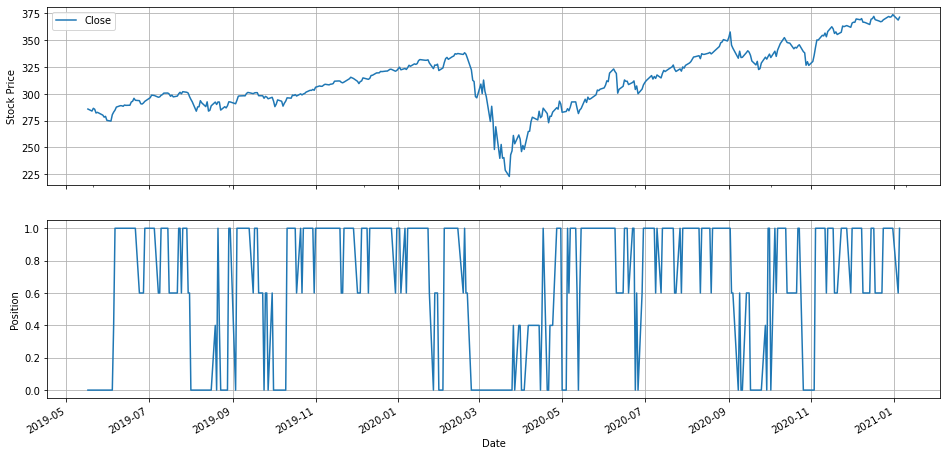

In [90]:
# Plot position
fig = plt.figure()
    
ax1 = fig.add_subplot(211)
mkt_df[['Close']].plot(ax=ax1,grid=True,figsize=(16,8))
ax1.set_ylabel('Stock Price')

ax2 = fig.add_subplot(212)
mkt_df['Position'].plot(ax=ax2,grid=True,figsize=(16,8), sharex=ax1)
ax2.set_ylabel('Position')

In [112]:
# Print out current recommended position.

last_row = mkt_df.iloc[[-1]]
if (last_row['Close'] >= last_row['GMMA_l_high']).bool() and (last_row['Close'] >= last_row['GMMA_s_high']).bool():
    print('Price is higher than both long-term and short-term MA.100% HOLD.')
elif (last_row['Close'] >= last_row['GMMA_l_high']).bool() and (last_row['Close'] <= last_row['GMMA_s_low']).bool():
    print('Price is higher than long-term MA but lower than short-term MA. 60% HOLD.')
elif (last_row['Close'] <= last_row['GMMA_l_high']).bool() and (last_row['Close'] >= last_row['GMMA_s_low']).bool():
    print('Price is lower than long-term MA but higher than short-term MA. 40% HOLD.')
else:
    print('Price is lower than both long-term and short-term MA.0% HOLD.')

Price is higher than both long-term and short-term MA.100% HOLD.
